In [13]:
import pandas as pd
import numpy as np
import xarray as xr


In [14]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv('/mnt/1A42C1DD42C1BE2F/MyProjects/ML_HEATWAVE/Preprocessed Data/data v2.csv')
df

,Unnamed: 0,time,lat,lon,air,tmax,tmin,pres,slp,prate,...,geo_hgt_500hpa,rhum_1000hpa,rhum_850hpa,rhum_500hpa,air_temp_1000hpa,air_temp_850hpa,air_temp_500hpa,shum_1000hpa,shum_850hpa,shum_500hpa
0,0,1996-01-01,27.5,87.5,270.52652,276.57867,263.73520,72750.0,101850.0,3.448496e-05,...,5722.75,95.250015,95.250015,62.500010,290.82500,282.15000,254.47500,0.012140,0.008038,0.001125
1,1,1996-01-01,27.5,90.0,271.19950,276.68207,267.29947,71830.0,102085.0,1.099892e-06,...,5725.75,85.500015,85.500015,78.250015,289.97500,282.15000,254.70001,0.010263,0.007180,0.001423
2,2,1996-01-01,27.5,92.5,275.07883,281.70786,266.92993,79140.0,102243.0,5.492864e-06,...,5725.50,84.500015,84.500015,83.000015,289.10000,281.92500,254.85000,0.009463,0.006945,0.001509
3,3,1996-01-01,25.0,87.5,288.74542,297.25735,282.01675,103830.0,102268.0,1.204104e-05,...,5746.00,63.000015,60.000015,34.250004,293.35000,283.67500,258.27502,0.009355,0.005583,0.000824
4,4,1996-01-01,25.0,90.0,287.91016,297.60540,281.89252,101010.0,102103.0,7.250792e-07,...,5749.50,66.250015,52.250015,37.750008,292.52500,283.97500,258.40002,0.009090,0.004960,0.000929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184075,184075,2022-12-31,22.5,90.0,292.70038,298.03186,288.64160,102212.5,101722.5,0.000000e+00,...,5815.75,45.500000,36.250000,4.500000,292.59998,284.32498,266.82498,0.006417,0.003502,0.000217
184076,184076,2022-12-31,22.5,92.5,285.88900,297.45840,275.03717,96197.5,101697.5,0.000000e+00,...,5808.00,40.750000,32.000000,5.500000,291.50000,284.39996,266.65000,0.005177,0.003140,0.000262
184077,184077,2022-12-31,20.0,87.5,296.73250,297.56732,295.06418,102035.0,101815.0,0.000000e+00,...,5862.75,62.750000,37.000000,12.500000,295.50000,287.02500,268.34998,0.010610,0.004300,0.000657
184078,184078,2022-12-31,20.0,90.0,295.04993,295.60022,294.09973,102087.5,101847.5,0.000000e+00,...,5855.75,57.000000,26.000000,11.000000,293.94998,286.62497,268.44998,0.008788,0.002942,0.000576


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184080 entries, 0 to 184079
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        184080 non-null  int64  
 1   time              184080 non-null  object 
 2   lat               184080 non-null  float64
 3   lon               184080 non-null  float64
 4   air               184080 non-null  float64
 5   tmax              184080 non-null  float64
 6   tmin              184080 non-null  float64
 7   pres              184080 non-null  float64
 8   slp               184080 non-null  float64
 9   prate             184080 non-null  float64
 10  daily_precp       184080 non-null  float64
 11  uwnd              184080 non-null  float64
 12  vwnd              184080 non-null  float64
 13  geo_hgt_1000hpa   184080 non-null  float64
 14  geo_hgt_850hpa    184080 non-null  float64
 15  geo_hgt_500hpa    184080 non-null  float64
 16  rhum_1000hpa      18

In [17]:
df2=df.set_index('time',inplace=False)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184080 entries, 1996-01-01 to 2022-12-31
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        184080 non-null  int64  
 1   lat               184080 non-null  float64
 2   lon               184080 non-null  float64
 3   air               184080 non-null  float64
 4   tmax              184080 non-null  float64
 5   tmin              184080 non-null  float64
 6   pres              184080 non-null  float64
 7   slp               184080 non-null  float64
 8   prate             184080 non-null  float64
 9   daily_precp       184080 non-null  float64
 10  uwnd              184080 non-null  float64
 11  vwnd              184080 non-null  float64
 12  geo_hgt_1000hpa   184080 non-null  float64
 13  geo_hgt_850hpa    184080 non-null  float64
 14  geo_hgt_500hpa    184080 non-null  float64
 15  rhum_1000hpa      184080 non-null  float64
 16  rhum_850hpa 

In [18]:
df2['tmax'].describe(percentiles=[.5,.75,.90,.95])

count    184080.000000
mean        297.609168
std           8.421464
min         270.707920
50%         300.293790
75%         302.300200
90%         305.233747
95%         308.270780
max         332.254760
Name: tmax, dtype: float64

In [19]:
df2['tmin'].describe(percentiles=[.5,.75,.90,.95])

count    184080.000000
mean        288.813132
std          10.929552
min         247.475740
50%         292.434450
75%         297.537200
90%         300.199550
95%         301.199500
max         305.332730
Name: tmin, dtype: float64

In [20]:
df2['air'].describe(percentiles=[.5,.75,.90,.95])

count    184080.000000
mean        293.188597
std           9.036946
min         259.241700
50%         296.811310
75%         299.880250
90%         301.714264
95%         302.532870
max         309.124200
Name: air, dtype: float64

In [21]:
df

,Unnamed: 0,time,lat,lon,air,tmax,tmin,pres,slp,prate,...,geo_hgt_500hpa,rhum_1000hpa,rhum_850hpa,rhum_500hpa,air_temp_1000hpa,air_temp_850hpa,air_temp_500hpa,shum_1000hpa,shum_850hpa,shum_500hpa
0,0,1996-01-01,27.5,87.5,270.52652,276.57867,263.73520,72750.0,101850.0,3.448496e-05,...,5722.75,95.250015,95.250015,62.500010,290.82500,282.15000,254.47500,0.012140,0.008038,0.001125
1,1,1996-01-01,27.5,90.0,271.19950,276.68207,267.29947,71830.0,102085.0,1.099892e-06,...,5725.75,85.500015,85.500015,78.250015,289.97500,282.15000,254.70001,0.010263,0.007180,0.001423
2,2,1996-01-01,27.5,92.5,275.07883,281.70786,266.92993,79140.0,102243.0,5.492864e-06,...,5725.50,84.500015,84.500015,83.000015,289.10000,281.92500,254.85000,0.009463,0.006945,0.001509
3,3,1996-01-01,25.0,87.5,288.74542,297.25735,282.01675,103830.0,102268.0,1.204104e-05,...,5746.00,63.000015,60.000015,34.250004,293.35000,283.67500,258.27502,0.009355,0.005583,0.000824
4,4,1996-01-01,25.0,90.0,287.91016,297.60540,281.89252,101010.0,102103.0,7.250792e-07,...,5749.50,66.250015,52.250015,37.750008,292.52500,283.97500,258.40002,0.009090,0.004960,0.000929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184075,184075,2022-12-31,22.5,90.0,292.70038,298.03186,288.64160,102212.5,101722.5,0.000000e+00,...,5815.75,45.500000,36.250000,4.500000,292.59998,284.32498,266.82498,0.006417,0.003502,0.000217
184076,184076,2022-12-31,22.5,92.5,285.88900,297.45840,275.03717,96197.5,101697.5,0.000000e+00,...,5808.00,40.750000,32.000000,5.500000,291.50000,284.39996,266.65000,0.005177,0.003140,0.000262
184077,184077,2022-12-31,20.0,87.5,296.73250,297.56732,295.06418,102035.0,101815.0,0.000000e+00,...,5862.75,62.750000,37.000000,12.500000,295.50000,287.02500,268.34998,0.010610,0.004300,0.000657
184078,184078,2022-12-31,20.0,90.0,295.04993,295.60022,294.09973,102087.5,101847.5,0.000000e+00,...,5855.75,57.000000,26.000000,11.000000,293.94998,286.62497,268.44998,0.008788,0.002942,0.000576


In [22]:
t2m_df2=df2['2021-03-27':'2021-03-27']

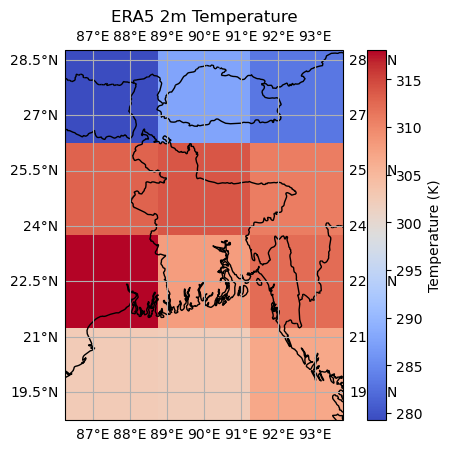

In [23]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df2['lat'].unique()
unique_lon = t2m_df2['lon'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df2['tmax'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()


In [55]:
# from tqdm.auto import tqdm


# lat_values=df.lat.unique()
# lon_values=df.lon.unique()
# dates=df.time.unique()


# consecutive_days = 0
# index_list = []

# for lat in tqdm(lat_values, desc='Latitudes',leave=True):
#     for lon in tqdm(lon_values, desc='Longitudes',leave=False):
#         for date in tqdm(dates, desc='Dates', leave=False):
#             date_mask = df['time'] == date
#             lat_mask = df['lat'] == lat
#             lon_mask = df['lon'] == lon
            
#             if (df[date_mask & lat_mask & lon_mask]['air'].values >= 301).any():
#                 consecutive_days += 1
#                 index_list.extend(df[date_mask & lat_mask & lon_mask].index)
#             else:
#                 consecutive_days = 0
#                 index_list = []
            
#             if consecutive_days >= 3:
#                 df.loc[index_list, 'Heatwave'] = 1
#                 if consecutive_days==3:
#                     print(index_list[0])
#                     value=df['lat'].iloc[index_list[0]],df['lon'].iloc[index_list[0]]
#                     print(value)

In [57]:
from tqdm.auto import tqdm


lat_values=df.lat.unique()
lon_values=df.lon.unique()
dates=df.time.unique()


consecutive_days = 0
index_list = []

for lat in tqdm(lat_values, desc='Latitudes',leave=True):
    for lon in tqdm(lon_values, desc='Longitudes',leave=False):
        for date in tqdm(dates, desc='Dates', leave=False):
            date_mask = df['time'] == date
            lat_mask = df['lat'] == lat
            lon_mask = df['lon'] == lon
            
            if (df[date_mask & lat_mask & lon_mask]['tmax'].values >= 305.233747).any() and (df[date_mask & lat_mask & lon_mask]['tmin'].values >= 300.199550).any():
                consecutive_days += 1
                index_list.extend(df[date_mask & lat_mask & lon_mask].index)
            else:
                consecutive_days = 0
                index_list = []
            
            if consecutive_days >= 3:
                df.loc[index_list, 'Heatwave'] = 1
                if consecutive_days==3:
                    print(index_list[0])
                    value=df['lat'].iloc[index_list[0]],df['lon'].iloc[index_list[0]]
                    print(value)

Latitudes:   0%|          | 0/4 [00:00<?, ?it/s]

Longitudes:   0%|          | 0/3 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Longitudes:   0%|          | 0/3 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Longitudes:   0%|          | 0/3 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

1782
(22.5, 87.5)
6006
(22.5, 87.5)
6162
(22.5, 87.5)
10326
(22.5, 87.5)
10518
(22.5, 87.5)
14550
(22.5, 87.5)
14658
(22.5, 87.5)
14814
(22.5, 87.5)
19098
(22.5, 87.5)
23490
(22.5, 87.5)
23742
(22.5, 87.5)
28218
(22.5, 87.5)
36594
(22.5, 87.5)
36642
(22.5, 87.5)
36798
(22.5, 87.5)
45522
(22.5, 87.5)
49686
(22.5, 87.5)
63150
(22.5, 87.5)
67746
(22.5, 87.5)
76194
(22.5, 87.5)
76410
(22.5, 87.5)
80346
(22.5, 87.5)
85026
(22.5, 87.5)
98298
(22.5, 87.5)
102414
(22.5, 87.5)
102498
(22.5, 87.5)
106830
(22.5, 87.5)
111366
(22.5, 87.5)
115854
(22.5, 87.5)
128430
(22.5, 87.5)
128670
(22.5, 87.5)
128946
(22.5, 87.5)
137718
(22.5, 87.5)
137826
(22.5, 87.5)
137970
(22.5, 87.5)
141774
(22.5, 87.5)
146046
(22.5, 87.5)
146526
(22.5, 87.5)
146634
(22.5, 87.5)
150714
(22.5, 87.5)
150930
(22.5, 87.5)
155010
(22.5, 87.5)
155346
(22.5, 87.5)
159498
(22.5, 87.5)
164118
(22.5, 87.5)
168150
(22.5, 87.5)
168258
(22.5, 87.5)
168318
(22.5, 87.5)
168510
(22.5, 87.5)
181302
(22.5, 87.5)
181518
(22.5, 87.5)
181614


Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

1555
(22.5, 90.0)
1711
(22.5, 90.0)
5983
(22.5, 90.0)
10315
(22.5, 90.0)
10519
(22.5, 90.0)
14563
(22.5, 90.0)
14815
(22.5, 90.0)
15031
(22.5, 90.0)
19147
(22.5, 90.0)
28159
(22.5, 90.0)
32347
(22.5, 90.0)
32659
(22.5, 90.0)
36595
(22.5, 90.0)
45379
(22.5, 90.0)
45559
(22.5, 90.0)
49663
(22.5, 90.0)
49927
(22.5, 90.0)
54439
(22.5, 90.0)
58579
(22.5, 90.0)
63199
(22.5, 90.0)
67123
(22.5, 90.0)
67255
(22.5, 90.0)
67579
(22.5, 90.0)
71719
(22.5, 90.0)
71803
(22.5, 90.0)
72043
(22.5, 90.0)
76195
(22.5, 90.0)
76303
(22.5, 90.0)
80335
(22.5, 90.0)
80695
(22.5, 90.0)
80779
(22.5, 90.0)
84907
(22.5, 90.0)
85027
(22.5, 90.0)
89047
(22.5, 90.0)
93715
(22.5, 90.0)
98179
(22.5, 90.0)
98347
(22.5, 90.0)
102055
(22.5, 90.0)
102355
(22.5, 90.0)
102487
(22.5, 90.0)
106999
(22.5, 90.0)
115783
(22.5, 90.0)
119971
(22.5, 90.0)
128395
(22.5, 90.0)
128659
(22.5, 90.0)
128935
(22.5, 90.0)
133063
(22.5, 90.0)
137287
(22.5, 90.0)
137575
(22.5, 90.0)
137731
(22.5, 90.0)
141787
(22.5, 90.0)
146179
(22.5, 90.0)


Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Longitudes:   0%|          | 0/3 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

1761
(20.0, 87.5)
15033
(20.0, 87.5)
23913
(20.0, 87.5)
32697
(20.0, 87.5)
62841
(20.0, 87.5)
67173
(20.0, 87.5)
71889
(20.0, 87.5)
75837
(20.0, 87.5)
76185
(20.0, 87.5)
76257
(20.0, 87.5)
89205
(20.0, 87.5)
93717
(20.0, 87.5)
98169
(20.0, 87.5)
98289
(20.0, 87.5)
102477
(20.0, 87.5)
119985
(20.0, 87.5)
128841
(20.0, 87.5)
128925
(20.0, 87.5)
137721
(20.0, 87.5)
146577
(20.0, 87.5)
146793
(20.0, 87.5)
150717
(20.0, 87.5)
168525
(20.0, 87.5)


Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

Dates:   0%|          | 0/15340 [00:00<?, ?it/s]

1247
(20.0, 92.5)
76055
(20.0, 92.5)
80267
(20.0, 92.5)
97811
(20.0, 92.5)
106499
(20.0, 92.5)


In [58]:
df[181614:]

,Unnamed: 0,time,lat,lon,air,tmax,tmin,pres,slp,prate,...,rhum_1000hpa,rhum_850hpa,rhum_500hpa,air_temp_1000hpa,air_temp_850hpa,air_temp_500hpa,shum_1000hpa,shum_850hpa,shum_500hpa,Heatwave
181614,181614,2022-06-09,22.5,87.5,304.69510,309.23804,300.91672,98217.5,99845.0,0.000000,...,69.00,49.75,41.00,304.30000,298.17500,267.92500,0.019510,0.011667,0.002113,1.0
181615,181615,2022-06-09,22.5,90.0,301.95776,303.71918,299.90590,100585.0,100140.0,0.000019,...,86.50,53.75,42.75,300.69998,294.37500,268.97498,0.019977,0.009933,0.002384,NaN
181616,181616,2022-06-09,22.5,92.5,297.97656,300.70215,295.85397,94990.0,100355.0,0.000071,...,92.75,74.25,64.50,299.39996,291.97498,270.09998,0.019842,0.011820,0.003908,NaN
181617,181617,2022-06-09,20.0,87.5,303.29180,304.06735,302.23312,100300.0,100117.5,0.000000,...,80.25,43.25,53.25,304.07498,298.52500,266.95000,0.022697,0.010370,0.002549,NaN
181618,181618,2022-06-09,20.0,90.0,302.39993,302.60007,301.69983,100517.5,100315.0,0.000140,...,87.00,54.00,77.75,301.80000,295.47498,268.52496,0.021532,0.010703,0.004188,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184075,184075,2022-12-31,22.5,90.0,292.70038,298.03186,288.64160,102212.5,101722.5,0.000000,...,45.50,36.25,4.50,292.59998,284.32498,266.82498,0.006417,0.003502,0.000217,NaN
184076,184076,2022-12-31,22.5,92.5,285.88900,297.45840,275.03717,96197.5,101697.5,0.000000,...,40.75,32.00,5.50,291.50000,284.39996,266.65000,0.005177,0.003140,0.000262,NaN
184077,184077,2022-12-31,20.0,87.5,296.73250,297.56732,295.06418,102035.0,101815.0,0.000000,...,62.75,37.00,12.50,295.50000,287.02500,268.34998,0.010610,0.004300,0.000657,NaN
184078,184078,2022-12-31,20.0,90.0,295.04993,295.60022,294.09973,102087.5,101847.5,0.000000,...,57.00,26.00,11.00,293.94998,286.62497,268.44998,0.008788,0.002942,0.000576,NaN


In [ ]:
df2=df.set_index('time',inplace=False)


<Axes: >

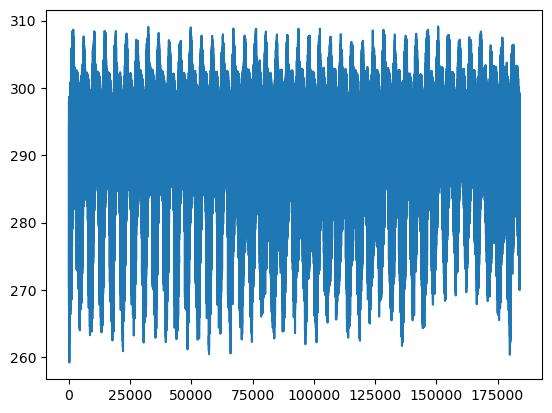

In [63]:
df['air'].plot()

In [69]:
t2m_df2=df2['2021-03-21':'2021-03-21']
t2m_df2

,Unnamed: 0,lat,lon,air,tmax,tmin,pres,slp,prate,daily_precp,...,geo_hgt_500hpa,rhum_1000hpa,rhum_850hpa,rhum_500hpa,air_temp_1000hpa,air_temp_850hpa,air_temp_500hpa,shum_1000hpa,shum_850hpa,shum_500hpa
time,,,,,,,,,,,,,,,,,,,,,
2021-03-21,176268,27.5,87.5,275.52948,277.82822,263.60272,72535.0,101142.5,0.000017,1.451610,...,5771.50,76.50,76.50,47.00,300.87500,290.37500,260.12500,0.018242,0.011165,0.001324
2021-03-21,176269,27.5,90.0,275.08582,277.77500,261.86987,71587.5,101272.5,0.000005,0.445611,...,5776.50,70.00,70.00,39.25,298.42500,288.94998,260.75000,0.014465,0.009330,0.001169
2021-03-21,176270,27.5,92.5,277.80222,282.06952,269.27176,78597.5,101140.0,0.000000,0.000000,...,5781.50,70.50,70.50,32.00,297.22498,288.82500,261.47500,0.013135,0.009177,0.001004
2021-03-21,176271,25.0,87.5,301.05030,310.95210,288.50717,102497.5,101015.0,0.000000,0.000000,...,5791.00,27.50,33.50,11.00,303.59998,292.55000,261.45000,0.007538,0.005555,0.000336
2021-03-21,176272,25.0,90.0,297.15800,306.74810,285.94824,99847.5,100907.5,0.000000,0.000000,...,5797.25,35.50,34.75,21.75,301.25000,291.17500,262.02500,0.008337,0.005287,0.000703
2021-03-21,176273,25.0,92.5,295.56485,306.41138,283.69934,96035.0,100822.5,0.000000,0.000000,...,5805.50,37.50,41.75,33.25,300.37500,291.34998,262.62500,0.008143,0.006410,0.001133
2021-03-21,176274,22.5,87.5,303.37036,315.65890,290.97120,99005.0,100617.5,0.000000,0.000000,...,5819.00,43.25,30.25,44.50,303.25000,293.80000,263.25000,0.010667,0.005425,0.001559
2021-03-21,176275,22.5,90.0,301.00488,305.98938,295.89264,101252.5,100807.5,0.000000,0.000000,...,5825.50,42.50,29.50,57.75,301.55000,292.85000,263.70000,0.010008,0.004980,0.002118
2021-03-21,176276,22.5,92.5,299.55377,308.65665,288.18063,95425.0,100782.5,0.000000,0.000000,...,5834.25,30.75,32.50,61.25,301.72498,293.19998,264.15000,0.007225,0.005605,0.002349


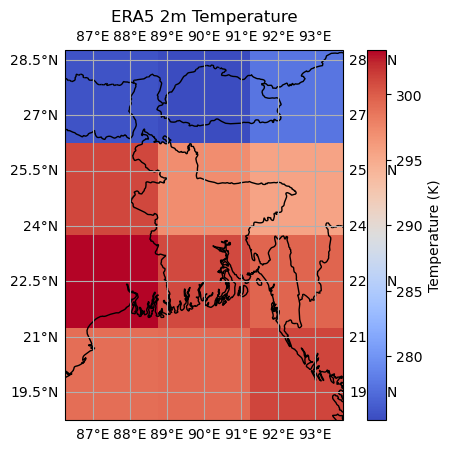

In [68]:
import warnings
warnings.filterwarnings("ignore")



# Assuming you have the t2m_df DataFrame with "latitude", "longitude", and "t2m" columns

unique_lat = t2m_df2['lat'].unique()
unique_lon = t2m_df2['lon'].unique()

# Reshape the t2m data into a 2D array matching the grid
t2m_array = t2m_df2['air'].values.reshape(len(unique_lat), len(unique_lon))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Plot the temperature data using pcolormesh
cax = ax.pcolormesh(unique_lon, unique_lat, t2m_array, transform=projection, cmap='coolwarm')

# Add colorbar
cbar = plt.colorbar(cax, ax=ax, orientation='vertical', pad=0.05, label='Temperature (K)')

# Set title and labels
ax.set_title('ERA5 2m Temperature')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the data to get only Bangladesh
bangladesh = world[world['name'] == 'Bangladesh']

# Plot Bangladesh
ax = bangladesh.plot(figsize=(10, 10), color='lightblue', edgecolor='black')

# Draw lat lon axes
ax.set_xticks(range(80, 100, 2))
ax.set_yticks(range(20, 30, 2))

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
plt.title('Map of Bangladesh')

# Show the plot
plt.show()


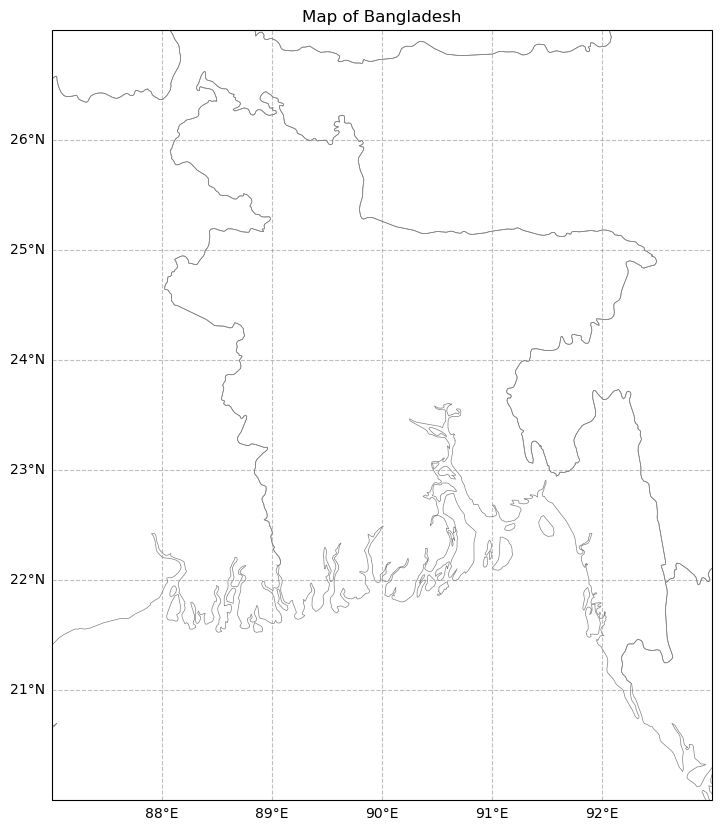

In [15]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a map with PlateCarree projection centered on Bangladesh
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 10))

# Set extent to cover Bangladesh
ax.set_extent([87,93, 20, 27])

# Add country borders
countries = cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='10m', edgecolor='gray', facecolor='none')
ax.add_feature(countries, linewidth=0.5)

# Draw lat lon grid
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

# Set labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Add a title
ax.set_title('Map of Bangladesh')

# Show the plot
plt.show()
